In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("AMES_Final_DF.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Columns: 274 entries, Lot Frontage to Sale Condition_Partial
dtypes: float64(11), int64(263)
memory usage: 6.1 MB


In [4]:
X = df.drop('SalePrice', axis = 1)
y = df['SalePrice']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# Split into 'train', 'CV', 'test' sets
X_train, X_dummy, y_train, y_dummy = train_test_split(X, y, test_size=0.3, random_state=101)
X_cv, X_test, y_cv, y_test = train_test_split (X_dummy, y_dummy, test_size = 0.5, random_state = 101)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
# Scale data
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_cv = scaler.transform(X_cv)
scaled_X_test = scaler.transform(X_test)

In [9]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

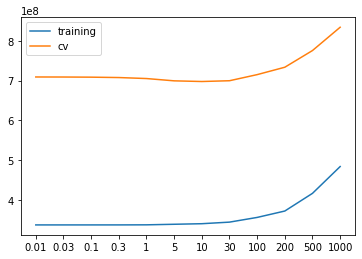

In [10]:
"""
Compute the training error and CV error for a range of lambda values
"""

alphas = [0.01, 0.03, 0.1, 0.3, 1, 5, 10, 30, 100, 200, 500, 1000]
training_errors = []
cv_errors = []

for alpha in alphas:
    ridge_model = Ridge(alpha = alpha)          # create linear reg. model, specifying lambda

    ridge_model.fit(scaled_X_train, y_train)    # train lin. reg. model to get theta parameters

    y_pred_train = ridge_model.predict(scaled_X_train)  # use model to predict for training set
    y_pred_cv = ridge_model.predict(scaled_X_cv)        # use model to predict for CV set

    MSE_train = mean_squared_error (y_pred_train, y_train)
    #RMSE_train = np.sqrt(MSE_train)

    MSE_cv = mean_squared_error (y_pred_cv, y_cv)
    #RMSE_cv = np.sqrt(MSE_cv)

    training_errors.append(MSE_train)
    cv_errors.append(MSE_cv)

plt.plot(training_errors, label = 'training')
plt.plot(cv_errors, label = 'cv')
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.legend()
plt.show()




These error graphs are still behaving strangely. The training error should be low for no regularisation, and continuously rise. The cv error should start out high, then dip towards the middle, and then begin to rise again. <br><br> Could this be because the training data is already too large? If we have fewer training examples, then the model should do a better job of fitting the training data with low bias, and so the training error should be lower, and the CV error higher. <br><br> Another possible reason is that a linear fit is just always going to be bad, and we will always have a relatively steady, high level of bias. So the next thing to try would be to try different polynomial degrees for our model.

<h5> Plan: </h5> <br>
1. Select only 100 training examples and 10 cv examples. Then plot error graphs. <br>
2. Select only 100 training examples and 10 cv examples. Pick optimal polynomial degree for model. Then plot error graphs

In [11]:
# Select smaller training and cv sets.

X_train, X_dummy, y_train, y_dummy = train_test_split(X, y, test_size=0.95, random_state=101)
X_cv, X_test, y_cv, y_test = train_test_split (X_dummy, y_dummy, test_size = 0.98, random_state = 101)
print (f'training set size: {len(X_train)} ||||| CV set size: {len(X_cv)}')

training set size: 146 ||||| CV set size: 55


In [12]:
# Scale X values
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_cv = scaler.transform(X_cv)
scaled_X_test = scaler.transform(X_test)

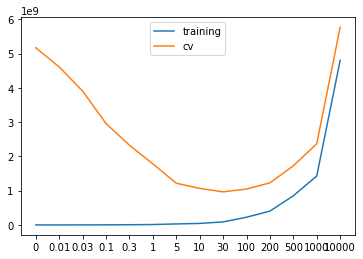

In [13]:
# Plot training error and cv error for a range of lambda values

alphas = [0, 0.01, 0.03, 0.1, 0.3, 1, 5, 10, 30, 100, 200, 500, 1000, 10000]
training_errors = []
cv_errors = []

for alpha in alphas:
    ridge_model = Ridge(alpha = alpha)          # create linear reg. model, specifying lambda

    ridge_model.fit(scaled_X_train, y_train)    # train lin. reg. model to get theta parameters

    y_pred_train = ridge_model.predict(scaled_X_train)  # use model to predict for training set
    y_pred_cv = ridge_model.predict(scaled_X_cv)        # use model to predict for CV set

    MSE_train = mean_squared_error (y_pred_train, y_train)
    #RMSE_train = np.sqrt(MSE_train)

    MSE_cv = mean_squared_error (y_pred_cv, y_cv)
    #RMSE_cv = np.sqrt(MSE_cv)

    training_errors.append(MSE_train)
    cv_errors.append(MSE_cv)

plt.plot(training_errors, label = 'training')
plt.plot(cv_errors, label = 'cv')
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.legend()
plt.show()

BAM! <br>
Great. This is behaving correctly. <br>
OK, now, just out of curiosity, let's keep playing around with the training set size and CV set size and see to what point the graphs behave correctly.

In [14]:
# Select slightly larger training set size.

X_train, X_dummy, y_train, y_dummy = train_test_split(X, y, test_size=0.85, random_state=101)
X_cv, X_test, y_cv, y_test = train_test_split (X_dummy, y_dummy, test_size = 0.98, random_state = 101)
len(X_train), len(X_cv)
print (f'training set size: {len(X_train)} ||||| CV set size: {len(X_cv)}')

training set size: 438 ||||| CV set size: 49


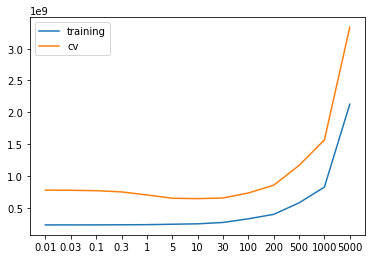

In [15]:
# Scale X values 

scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_cv = scaler.transform(X_cv)
scaled_X_test = scaler.transform(X_test)

# plot training error and CV error for range of lambda values
alphas = [0.01, 0.03, 0.1, 0.3, 1, 5, 10, 30, 100, 200, 500, 1000, 5000]
training_errors = []
cv_errors = []

for alpha in alphas:
    ridge_model = Ridge(alpha = alpha)          # create linear reg. model, specifying lambda

    ridge_model.fit(scaled_X_train, y_train)    # train lin. reg. model to get theta parameters

    y_pred_train = ridge_model.predict(scaled_X_train)  # use model to predict for training set
    y_pred_cv = ridge_model.predict(scaled_X_cv)        # use model to predict for CV set

    MSE_train = mean_squared_error (y_pred_train, y_train)
    #RMSE_train = np.sqrt(MSE_train)

    MSE_cv = mean_squared_error (y_pred_cv, y_cv)
    #RMSE_cv = np.sqrt(MSE_cv)

    training_errors.append(MSE_train)
    cv_errors.append(MSE_cv)

plt.plot(training_errors, label = 'training')
plt.plot(cv_errors, label = 'cv')
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.legend()
plt.show()

Note: With absolutely no regularisation (lambda = 0), the CV error is much much too high, making the graph illegible. So I plotted from lambda = 0.01

In [16]:
# Select another larger training set.

X_train, X_dummy, y_train, y_dummy = train_test_split(X, y, test_size=0.65, random_state=101)
X_cv, X_test, y_cv, y_test = train_test_split (X_dummy, y_dummy, test_size = 0.9, random_state = 101)
len(X_train), len(X_cv)
print (f'training set size: {len(X_train)} ||||| CV set size: {len(X_cv)}')

training set size: 1023 ||||| CV set size: 190


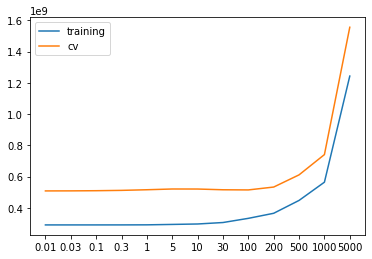

In [17]:
# Scale X values
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_cv = scaler.transform(X_cv)
scaled_X_test = scaler.transform(X_test)

# plot training error and CV error for range of lambda values
alphas = [0.01, 0.03, 0.1, 0.3, 1, 5, 10, 30, 100, 200, 500, 1000, 5000]
training_errors = []
cv_errors = []

for alpha in alphas:
    ridge_model = Ridge(alpha = alpha)          # create linear reg. model, specifying lambda

    ridge_model.fit(scaled_X_train, y_train)    # train lin. reg. model to get theta parameters

    y_pred_train = ridge_model.predict(scaled_X_train)  # use model to predict for training set
    y_pred_cv = ridge_model.predict(scaled_X_cv)        # use model to predict for CV set

    MSE_train = mean_squared_error (y_pred_train, y_train)
    #RMSE_train = np.sqrt(MSE_train)

    MSE_cv = mean_squared_error (y_pred_cv, y_cv)
    #RMSE_cv = np.sqrt(MSE_cv)

    training_errors.append(MSE_train)
    cv_errors.append(MSE_cv)

plt.plot(training_errors, label = 'training')
plt.plot(cv_errors, label = 'cv')
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.legend()
plt.show()

OK, now this is really starting to make sense. Remember Andrew Ng said – if you have high variance, adding more training samples will reduce the error. This is exactly what we're seeing. As we increase the number of training samples, the error at lambda = 0.01 went from 5 * 10^9, to 0.8 * 10^9, to 0.58 * 10^9. 

<h5> Based on the graphs above, it seems that with Ridge regression, lambda = 30 is around the ideal value. Now let's use cross_val_scores and cross_validate. These will automatically split the training set into a sub-training-set and CV set. So we only need to split the data into X_train and X_test (holdout) </h5>

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101) # Holdout test set size = 10%

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [20]:
from sklearn.model_selection import cross_val_score

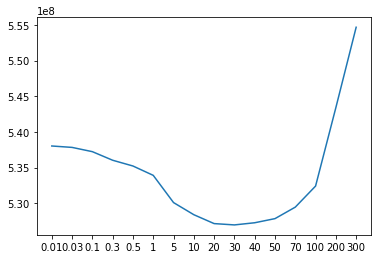

In [21]:
# Compute and plot CV error for a range of lambda values

alphas = [0.01, 0.03, 0.1, 0.3, 0.5, 1, 5, 10, 20, 30, 40, 50, 70, 100, 200, 300]
cv_errors = []
for alpha in alphas:
    model = Ridge(alpha = alpha)
    scores = cross_val_score(model, scaled_X_train, y_train, scoring='neg_mean_squared_error',cv=5)
    avg_score = abs(scores).mean()
    cv_errors.append(avg_score)

plt.plot(cv_errors)
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.show()


Good. We once again confirm that the ideal lambda is around 30 for ridge regression <br>
Now let's plot the same graph for denser values around 30.

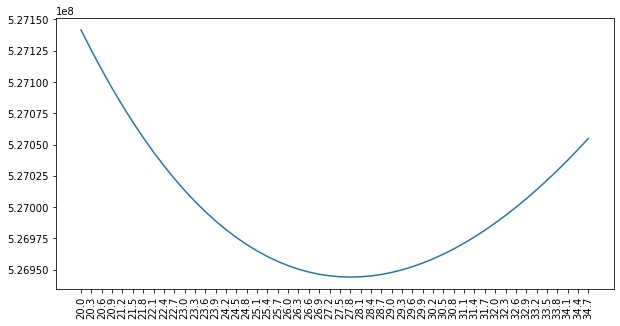

In [22]:
# Once again plot CV error values, for many lambdas in the vicinity of 30. 

alphas = [round (20 + 0.3*i, 2) for i in range (50)]
cv_errors = []
for alpha in alphas:
    model = Ridge(alpha = alpha)
    scores = cross_val_score(model, scaled_X_train, y_train, scoring='neg_mean_squared_error',cv=5)
    avg_score = abs(scores).mean()
    cv_errors.append(avg_score)

plt.figure(figsize = (10,5))
plt.plot(cv_errors)
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.xticks(rotation = 90)
plt.show()

<h5> We'll pick lambda = 28 and use this as our model </h5>

<h5> Predict and Evaluate </h5>

In [23]:
model = Ridge (alpha = 28)  # We found lambda = 28 was ideal.
model.fit(scaled_X_train, y_train)
train_pred_y = model.predict(scaled_X_train)
test_pred_y = model.predict(scaled_X_test)

# Compute root mean square error for training data and test data
train_RMSE = np.sqrt(mean_squared_error(train_pred_y, y_train))
test_RMSE = np.sqrt (mean_squared_error(test_pred_y, y_test))

train_RMSE, test_RMSE


(19556.940000540737, 20790.275273469117)

In [24]:
# Compute test error as percentage of mean: 
100*test_RMSE / (df['SalePrice'].mean())

11.49805794805641

<h5> Alright. Using linear ridge regression, we get a test error of 11.5 per cent. Now we'll create a linear lasso model and compare. </h5>

Once again, let's begin by plotting training error and CV error for smaller training set sizes. 

In [25]:
# Select smaller training and CV sets.

X_train, X_dummy, y_train, y_dummy = train_test_split(X, y, test_size=0.95, random_state=101)
X_cv, X_test, y_cv, y_test = train_test_split (X_dummy, y_dummy, test_size = 0.98, random_state = 101)
print (f'training set size: {len(X_train)} ||||| CV set size: {len(X_cv)}')


training set size: 146 ||||| CV set size: 55


In [26]:
# Scale X values
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_cv = scaler.transform(X_cv)
scaled_X_test = scaler.transform(X_test)


In [27]:
from sklearn.linear_model import Lasso, ElasticNet, LassoCV, ElasticNetCV

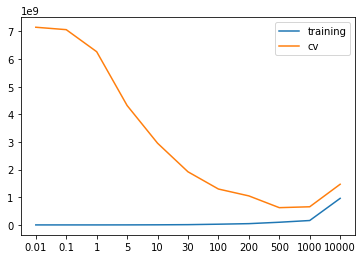

In [28]:
# Plot training error and cv error for a range of lambda values

alphas = [0.01, 0.1, 1, 5, 10, 30, 100, 200, 500, 1000, 10000]
training_errors = []
cv_errors = []

for alpha in alphas:
    lasso_model = Lasso(alpha = alpha, max_iter=10000)          # create linear reg. model, specifying lambda

    lasso_model.fit(scaled_X_train, y_train)    # train lin. reg. model to get theta parameters

    y_pred_train = lasso_model.predict(scaled_X_train)  # use model to predict for training set
    y_pred_cv = lasso_model.predict(scaled_X_cv)        # use model to predict for CV set

    MSE_train = mean_squared_error (y_pred_train, y_train)
    #RMSE_train = np.sqrt(MSE_train)

    MSE_cv = mean_squared_error (y_pred_cv, y_cv)
    #RMSE_cv = np.sqrt(MSE_cv)

    training_errors.append(MSE_train)
    cv_errors.append(MSE_cv)

plt.plot(training_errors, label = 'training')
plt.plot(cv_errors, label = 'cv')
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.legend()
plt.show()


Interesting. So the cv error reaches its optimum much later with Lasso regularisation than Ridge regularisation. This makes sense, since you are 'punishing' the theta values linearly, not as a function of the squares. 

In [29]:
# Select slightly larger training set size.

X_train, X_dummy, y_train, y_dummy = train_test_split(X, y, test_size=0.85, random_state=101)
X_cv, X_test, y_cv, y_test = train_test_split (X_dummy, y_dummy, test_size = 0.98, random_state = 101)
len(X_train), len(X_cv)
print (f'training set size: {len(X_train)} ||||| CV set size: {len(X_cv)}')

training set size: 438 ||||| CV set size: 49


In [30]:
# Scale X values
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_cv = scaler.transform(X_cv)
scaled_X_test = scaler.transform(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2692324909.8346252, tolerance: 299642180.2733224
  model = cd_fast.enet_coordinate_descent(


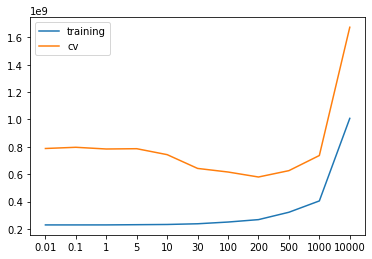

In [31]:
# Plot training error and cv error for a range of lambda values

alphas = [0.01, 0.1, 1, 5, 10, 30, 100, 200, 500, 1000, 10000]
training_errors = []
cv_errors = []

for alpha in alphas:
    lasso_model = Lasso(alpha = alpha, max_iter=100000)          # create linear reg. model, specifying lambda

    lasso_model.fit(scaled_X_train, y_train)    # train lin. reg. model to get theta parameters

    y_pred_train = lasso_model.predict(scaled_X_train)  # use model to predict for training set
    y_pred_cv = lasso_model.predict(scaled_X_cv)        # use model to predict for CV set

    MSE_train = mean_squared_error (y_pred_train, y_train)
    #RMSE_train = np.sqrt(MSE_train)

    MSE_cv = mean_squared_error (y_pred_cv, y_cv)
    #RMSE_cv = np.sqrt(MSE_cv)

    training_errors.append(MSE_train)
    cv_errors.append(MSE_cv)

plt.plot(training_errors, label = 'training')
plt.plot(cv_errors, label = 'cv')
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.legend()
plt.show()

CV error seems to be minimised somewhere between lambda = 100:1000
So we'll modify the range of alphas a bit.

In [32]:
# Select another larger training set.

X_train, X_dummy, y_train, y_dummy = train_test_split(X, y, test_size=0.65, random_state=101)
X_cv, X_test, y_cv, y_test = train_test_split (X_dummy, y_dummy, test_size = 0.9, random_state = 101)
len(X_train), len(X_cv)
print (f'training set size: {len(X_train)} ||||| CV set size: {len(X_cv)}')

training set size: 1023 ||||| CV set size: 190


In [33]:
# Scale X values
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_cv = scaler.transform(X_cv)
scaled_X_test = scaler.transform(X_test)

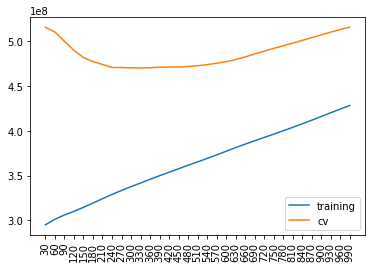

In [34]:
# Plot training error and cv error for a range of lambda values

alphas = list(range(30,1000,30))
training_errors = []
cv_errors = []

for alpha in alphas:
    lasso_model = Lasso(alpha = alpha, max_iter=100000)          # create linear reg. model, specifying lambda

    lasso_model.fit(scaled_X_train, y_train)    # train lin. reg. model to get theta parameters

    y_pred_train = lasso_model.predict(scaled_X_train)  # use model to predict for training set
    y_pred_cv = lasso_model.predict(scaled_X_cv)        # use model to predict for CV set

    MSE_train = mean_squared_error (y_pred_train, y_train)
    #RMSE_train = np.sqrt(MSE_train)

    MSE_cv = mean_squared_error (y_pred_cv, y_cv)
    #RMSE_cv = np.sqrt(MSE_cv)

    training_errors.append(MSE_train)
    cv_errors.append(MSE_cv)

plt.plot(training_errors, label = 'training')
plt.plot(cv_errors, label = 'cv')
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

It's harder to see visually from the graph where the ideal lambda value lies. The range seems to be somewhere between 60 and 600. 

Now we will once again use cross_val_score to find the optimum value.

Once again, cross_val_scores automatically splits the training set into a sub-training-set and cross_val set, so we only need to split our original data into a training set and (final holdout) test set.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101) # Holdout test set size = 10%

In [36]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)


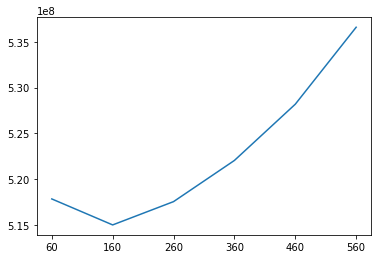

In [37]:
# Compute and plot CV error for a range of lambda values from 100 to 600

alphas = list(range(60,600,100))
cv_errors = []
for alpha in alphas:
    model = Lasso(alpha = alpha)
    scores = cross_val_score(model, scaled_X_train, y_train, scoring='neg_mean_squared_error',cv=5)
    avg_score = abs(scores).mean()
    cv_errors.append(avg_score)

plt.plot(cv_errors)
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.show()


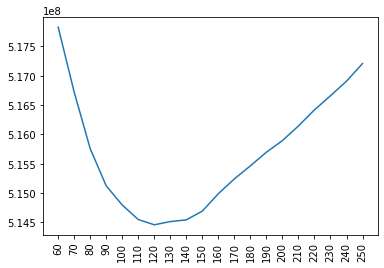

In [38]:
# Make the range of lambda values even narrower.
alphas = list(range(60,260,10))
cv_errors = []
for alpha in alphas:
    model = Lasso(alpha = alpha)
    scores = cross_val_score(model, scaled_X_train, y_train, scoring='neg_mean_squared_error',cv=5)
    avg_score = abs(scores).mean()
    cv_errors.append(avg_score)

plt.plot(cv_errors)
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.xticks(rotation = 90)
plt.show()

lambda = 120 seems to be the ideal value for Lasso regularisation.

<h5> Predict and Evaluate </h5>

In [39]:
model = Lasso (alpha = 120)  # We found lambda = 28 was ideal.
model.fit(scaled_X_train, y_train)
train_pred_y = model.predict(scaled_X_train)
test_pred_y = model.predict(scaled_X_test)

# Compute root mean square error for training data and test data
train_RMSE = np.sqrt(mean_squared_error(train_pred_y, y_train))
test_RMSE = np.sqrt (mean_squared_error(test_pred_y, y_test))

train_RMSE, test_RMSE

# Compute test error as percentage of mean: 
100*test_RMSE / (df['SalePrice'].mean())


11.369701529187797

The test error with Ridge regularisation was 11.50%. So we have a very very mild improvement. <br> <br>
However, Lasso regularisation is still preferable, since it will eliminate many of the theta coefficients.

In [40]:
#Check theta coefficients
model.coef_

array([ 6.91210436e+02,  4.85397629e+03,  1.03258341e+04,  6.08219300e+03,
        1.11982650e+04,  1.99901087e+03,  5.24880347e+03,  9.42341711e+03,
        1.82000841e+03, -0.00000000e+00,  8.86448827e+03,  0.00000000e+00,
        2.87059378e+03, -8.92463089e+02,  2.81918709e+04,  5.83856183e+02,
       -1.66670739e+02,  1.28230352e+03,  8.97910805e+02, -3.48503995e+03,
       -2.19253054e+03,  0.00000000e+00,  2.31955071e+03, -0.00000000e+00,
        2.21716781e+03,  3.23606128e+03,  1.01051788e+03,  2.04473243e+02,
        1.87954443e+02, -0.00000000e+00,  2.17094088e+03,  1.81711916e+03,
        1.63591158e+02, -3.19340783e+02, -5.25064335e+02, -4.58863469e+02,
       -1.12963298e+03,  0.00000000e+00, -2.40319966e+02,  1.55717264e+03,
        1.65876390e+03,  6.24906228e+02,  7.67087423e+02,  3.82817405e+02,
       -0.00000000e+00,  1.17958953e+03, -0.00000000e+00, -0.00000000e+00,
        2.59106822e+02, -2.13854567e+03, -4.25238540e+02,  0.00000000e+00,
        0.00000000e+00,  

In [41]:
len(model.coef_), np.count_nonzero(model.coef_)

(273, 203)

So out of the 273 possible theta coefficients, our Lasso Linear Regression model eliminates 70 thetas! 

<h5> Plan now: <br><br>
Perform ElasticNet regularisation. (So check one more linear case) <br>
Determine optimal polynomial degree. <br>
Repeat prediction + evaluation for Ridge, Lasso, and ElasticNet regressions. </h5>

In [42]:
# Train | Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101) # Holdout test set size = 10%

# Scale
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)


In [43]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [44]:
# Start by creating an instance of ElasticNet

base_elastic_net = ElasticNet(max_iter = 50000)

In [45]:
# We will pass in a range of lambda and r values ('alpha' and 'l1_ratio') into a grid search. 
# Note: l1_ratio –> 0 means Ridge; l1_ratio –> 1 means Lasso

# Grid parameters
param_grid = {'alpha': [0.01, 0.1, 0.3, 0.5, 1, 3, 6, 10, 30, 50, 100, 300], 
              'l1_ratio': [0.01, 0.03, 0.06, 0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99, 1]
                }
grid_model = GridSearchCV(estimator= base_elastic_net, 
                          param_grid = param_grid, 
                          scoring = 'neg_mean_squared_error', 
                          cv = 2,
                          verbose = 0)




In [46]:
grid_model.fit(scaled_X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68322039387.85443, tolerance: 799082441.8056953
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126050768198.80307, tolerance: 916636759.0980848
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15673519476.961517, tolerance: 799082441.8056953
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarn

GridSearchCV(cv=2, estimator=ElasticNet(max_iter=50000),
             param_grid={'alpha': [0.01, 0.1, 0.3, 0.5, 1, 3, 6, 10, 30, 50,
                                   100, 300],
                         'l1_ratio': [0.01, 0.03, 0.06, 0.1, 0.3, 0.5, 0.7, 0.9,
                                      0.95, 0.99, 1]},
             scoring='neg_mean_squared_error')

In [47]:
grid_model.best_estimator_

ElasticNet(alpha=300, l1_ratio=1, max_iter=50000)

In [48]:
pd.DataFrame(grid_model.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
131,0.034369,0.002594,0.000477,0.000015,300,1,"{'alpha': 300, 'l1_ratio': 1}",-5.984800e+08,-4.686068e+08,-5.335434e+08,6.493659e+07,1
120,0.091497,0.002646,0.000593,0.000046,100,1,"{'alpha': 100, 'l1_ratio': 1}",-5.927216e+08,-4.919698e+08,-5.423457e+08,5.037590e+07,2
52,0.124292,0.001314,0.000957,0.000070,1,0.95,"{'alpha': 1, 'l1_ratio': 0.95}",-6.068779e+08,-4.930377e+08,-5.499578e+08,5.692011e+07,3
40,0.148612,0.008461,0.000732,0.000096,0.5,0.9,"{'alpha': 0.5, 'l1_ratio': 0.9}",-6.069067e+08,-4.931345e+08,-5.500206e+08,5.688613e+07,4
16,0.265973,0.000595,0.003857,0.002986,0.1,0.5,"{'alpha': 0.1, 'l1_ratio': 0.5}",-6.069302e+08,-4.932123e+08,-5.500713e+08,5.685896e+07,5
...,...,...,...,...,...,...,...,...,...,...,...,...
125,0.003893,0.000272,0.000527,0.000022,300,0.3,"{'alpha': 300, 'l1_ratio': 0.3}",-6.289992e+09,-5.400496e+09,-5.845244e+09,4.447478e+08,128
124,0.004054,0.000805,0.000497,0.000052,300,0.1,"{'alpha': 300, 'l1_ratio': 0.1}",-6.426772e+09,-5.535954e+09,-5.981363e+09,4.454092e+08,129
123,0.004296,0.000809,0.000883,0.000407,300,0.06,"{'alpha': 300, 'l1_ratio': 0.06}",-6.447696e+09,-5.556705e+09,-6.002201e+09,4.454957e+08,130
122,0.004313,0.000386,0.000709,0.000164,300,0.03,"{'alpha': 300, 'l1_ratio': 0.03}",-6.462344e+09,-5.571236e+09,-6.016790e+09,4.455539e+08,131


<h5> Use best model from grid search for prediction </h5>

In [49]:
y_test_pred = grid_model.predict(scaled_X_test)


Evaluation of prediction

In [50]:
RMSE = np.sqrt(mean_squared_error(y_test_pred, y_test))
RMSE, 100*(RMSE) / df['SalePrice'].mean()

(20763.091450857577, 11.483023939919152)

Accuracy is actually lower than when we performed only Lasso with lambda = 120.

<h5> Summary so far </h5>

For linear regression (with no polynomial features), our most accurate prediction came with Lasso regularisation with lambda = 120. The root mean squared error was 11.37% of the mean sales price. <br><br>

Now we will try a polynomial fit

<h5> Search for optimal polynomial degree </h5>

<h5> Outline </h5>

0. Select relatively small training set size (around 150 samples) <br>
1. Choose polynomial degree d from [2, 3, 4, 5] <br>
2. Pick regression type from [Ridge, Lasso, ElasticNet] <br>
3a. Plot training error vs CV error for the different lambda values. Get a sense of optimal range for lambda. <br>
3b. Increase training set size and plot training error vs CV error. Find optimal lambda value. <br>
3b. Predict on test set. <br>
3c. Compute test set error. <br>
4. Find optimal model for polynomial degree d. Then repeat for other polynomial degrees. <br>
